1.
Iniciamos con la siguiente formula:
$$-\bigtriangledown _{t}^{2}=\frac{1}{D}$$
Resolviendo para $\bigtriangledown _{t}^{2}$:

$$\bigtriangledown _{t}^{2}=\frac{1}{r^{2}}\frac{\partial }{\partial r}\left ( r^{2}\frac{\partial t}{\partial r} \right )+\frac{1}{r^{2}\sin\theta}\frac{\partial }{\partial \theta }\left ( \sin \theta \frac{\partial t}{\partial \theta } \right )+\frac{1}{r^{2}\sin^{2}\theta}\frac{\partial^2 t}{\partial \phi ^2}$$
Debido a que  buscamos algo que dependa unicamente de $t$, los términos sin esta van a ser eliminados, dejándonos con: 
$$\bigtriangledown _{t}^{2}=\frac{1}{r^{2}}\frac{\partial }{\partial r}\left ( r^{2}\frac{\partial t}{\partial t} \right )=-\frac{1}{D}$$
Desarrollando, llegamos a la siguiente ecuación diferencial:
$$\frac{\partial^2 t}{\partial r^{2}}+\frac{2}{r}\frac{\partial t }{\partial r}+\frac{1}{D}=0$$

2.

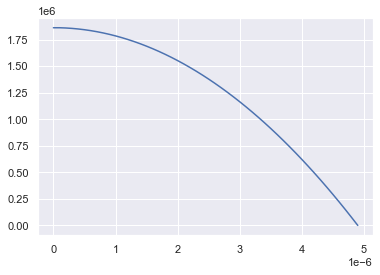

In [50]:
#teniendo t''+t'2/r+1/D=0
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sl
import seaborn as sns; sns.set()
import matplotlib as mlp
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline

D=4.05*10**(-21)/(6*np.pi*1*10**(-7))*(1*10**(-3))
R=5*10**(-6)
N=50
dr=R/N
x0=0
xN=0
r=np.arange(0,R,dr)


M=np.matrix([np.array([(r[ri]-dr if rj==ri-1 and ri>0 else 0) for rj in range (N)])for ri in range(N)])
M+=np.matrix([np.array([(-2*r[ri] if rj==ri else 0) for rj in range (N)])for ri in range(N)])
M+=np.matrix([np.array([(r[ri]+dr if rj==ri+1 and ri<N-1 else 0) for rj in range (N)])for ri in range(N)])


M[0,:] = np.zeros(N)
M[0,0] = 1
M[0,1] = -1
M[-1, -1] = 1




b=np.matrix([np.array([((-1*r[i]*dr**2)/D if i<N-1 else xN) for i in range(N)])]).T

T=np.array((np.linalg.inv(M)*b).T).flatten()
r2=np.arange(0,N*dr,dr)

plt.plot(r2,T)

3.

In [51]:
#Integral por el método del trapecio
V = (4/3)*np.pi*R**3
f = lambda r: (((R**2)/(6*D))-(1/((6*D)*r**2)))*r**2

def trapeciof(inf,sup,n):
    h = (sup-inf)/n
    s = 0.5*(f(inf)-f(sup))
    for i in range(1,n):
        s+=f(inf+i*h)
    integral = h*s
    return integral
respuesta = trapeciof(0.00001,R,200000)*(4*np.pi/V)
print(f"Un virion tardaría {respuesta} segundos en salir de la gota")


Un virion tardaría 9.308376135169592e+27 segundos en salir de la gota


4.

In [69]:
N=200
dif = R/N
x=np.arange(0,1,N)
dt=0.2
alfa=(D*dt)/dif**2 
def actualiza_objetos(n):
    # esta funcion me dice de n objetos cuantos van a la izquierda y cuantos a la derecha
    v = np.random.uniform(size=N)
    izq = sum(v<alfa)
    der = sum(v<2*alfa) - izq
    arriba=sum(v<alfa)
    abajo=sum(v<alfa)-arriba
    return (izq,der,arriba,abajo)

def actualiza_phi(phi):
    # calcular cuantos se van a la derecha y cuantos a la izquierda
    dphi = np.array([actualiza_objetos(_phi) for _phi in phi]).T
    # verificar cuantos hay.... reajustar cuantos se van: condiciones de frontera
    dphi[0,0] = 0
    dphi[1,-1] = 0
    # sumar los q tenia phi0 + los q llegan - los q se van
    dphi_izq = np.roll(dphi[0],-1)
    dphi_der = np.roll(dphi[1], 1)
    dphi = np.sum(dphi, axis=0)
    return phi-dphi+dphi_izq+dphi_der

1
